In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import time
%matplotlib notebook
sn.set_style("ticks",sn.axes_style({'axes.grid': True}))

def distance(a,b):
    d = np.sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2 )
    return d

In [67]:
random = np.loadtxt('100k_weighted_random.dat')
data = np.loadtxt('100k_weighted_north_cmass.dat')
dt=data.transpose()
rt=random.transpose()

In [3]:
#plt.figure()
#ax=plt.axes(projection="3d")
#ax.scatter(dt[0],dt[1],dt[3],s=2)

#plt.figure()
#plt.scatter(dt[0],dt[1],s=2,marker='H',alpha=0.1)

#plt.figure()
#plt.scatter(rt[0],rt[1],s=2,marker='H',alpha=0.1)



#plt.figure()
#zhist = plt.hist(dt[2],bins=75)

#plt.figure()
#cdhist =  plt.hist(dt[3],bins=75)

In [4]:
# z=v/c , v=h_0*d , z*c = h_0*d -> d=(z*c)/h_0
# ra = theta
# dec = phi

def spherical_to_cartesian(ar):

    newpts=[]

    for i in range(len(ar[0])):
        ra = np.deg2rad(ar[0,i])
        dec = np.deg2rad(ar[1,i])
        #zr=dt[2,i]
        cmd=ar[3,i]

        ############################

        x=cmd*np.cos(ra)*np.cos(dec)
        y=cmd*np.sin(ra)*np.cos(dec)
        z=cmd*np.sin(dec)

        ############################


        xyz=[x,y,z]
        
        newpts.append(xyz)
        
    return np.array(newpts).transpose()

In [5]:
d_conv=spherical_to_cartesian(dt)

r_conv=spherical_to_cartesian(rt)

#plt.figure()
#ax=plt.axes(projection="3d")
#ax.scatter(d_conv[0],d_conv[1],d_conv[2],s=2)

In [17]:
ndivs = 50

rxpts = np.linspace(np.round(min(r_conv[0])),np.round(max(r_conv[0])),ndivs)
rypts = np.linspace(np.round(min(r_conv[1])),np.round(max(r_conv[1])),ndivs)
rzpts = np.linspace(np.round(min(r_conv[2])),np.round(max(r_conv[2])),ndivs)

dxpts = np.linspace(np.round(min(d_conv[0])),np.round(max(d_conv[0])),ndivs)
dypts = np.linspace(np.round(min(d_conv[1])),np.round(max(d_conv[1])),ndivs)
dzpts = np.linspace(np.round(min(d_conv[2])),np.round(max(d_conv[2])),ndivs)

In [18]:
ddivs_master = {}

xwidth=dxpts[1]-dxpts[0]
ywidth=dypts[1]-dypts[0]
zwidth=dzpts[1]-dzpts[0]

x,y,z=d_conv[0],d_conv[1],d_conv[2]

ddivs = []

for a,i in enumerate(dxpts[range(ndivs)]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth

    for b,j in enumerate(dypts[range(ndivs)]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(dzpts[range(ndivs)]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            ddivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            ddivs_master[key] = [xsub,ysub,zsub]

In [19]:
rdivs_master = {}

xwidth=rxpts[1]-rxpts[0]
ywidth=rypts[1]-rypts[0]
zwidth=rzpts[1]-rzpts[0]

x,y,z=r_conv[0],r_conv[1],r_conv[2]

rdivs = []

for a,i in enumerate(rxpts[range(ndivs)]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth

    for b,j in enumerate(rypts[range(ndivs)]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(rzpts[range(ndivs)]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            rdivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            rdivs_master[key] = [xsub,ysub,zsub]


<IPython.core.display.Javascript object>


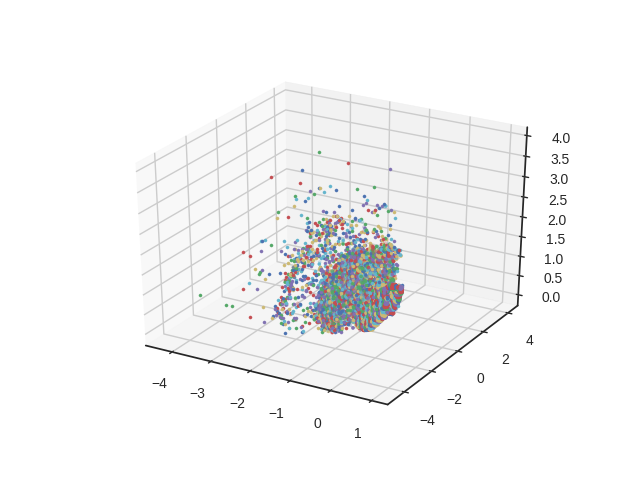

In [29]:
plt.figure()
ax = plt.axes(projection='3d')

for i in range(ndivs):
    for j in range(ndivs):
        for k in range(ndivs):
            key = "%02d%02d%02d" % (i,j,k)
            ax.scatter(ddivs_master[key][0],ddivs_master[key][1],ddivs_master[key][2],s=20,marker='.')
            
#plt.title('Party Sphere')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')

In [27]:
######################################################################################
# nearest neighbor
######################################################################################

nsubs = ndivs-1

hist_dd = np.zeros(100)
hist_dr = np.zeros(100)
hist_rr = np.zeros(100)

start = time.time()
for i in range(nsubs):
    
    for j in range(nsubs):
        
        for k in range(nsubs):
            
            home = "%02d%02d%02d" % (i,j,k)

            for nni in range(i,i+2):
                
                for nnj in range(j,j+2):
                    
                    for nnk in range(k,k+2):
                        
                        if nni<nsubs and nnj<nsubs and nnk<nsubs:
                            nn = "%02d%02d%02d" % (nni,nnj,nnk)
                            #print("\t",nn)
                            
                            d_home_subdiv = np.array(ddivs_master[home]).transpose()
                            d_nn_subdiv = np.array(ddivs_master[nn]).transpose()
                            r_home_subdiv = np.array(rdivs_master[home]).transpose()
                            r_nn_subdiv = np.array(rdivs_master[nn]).transpose()
                            
                            for dpt in range(0,len(d_home_subdiv)):
                                pos1=d_home_subdiv[dpt]
                                pos2=d_nn_subdiv[:].transpose()
                                d_dist=distance(pos1,pos2)

                                dr_dist=distance(pos1,r_nn_subdiv[:].transpose())

                                h_dd = np.histogram(d_dist,bins=100)
                                hist_dd += h_dd[0]
                                
                                h_dr = np.histogram(dr_dist,bins=100)
                                hist_dr += h_dr[0]
                                
                            for rpt in range(0,len(r_home_subdiv)):
                                pos1=r_home_subdiv[rpt]
                                pos2=r_nn_subdiv[:].transpose()
                                r_dist=distance(pos1,pos2)
                                
                                h_rr = np.histogram(r_dist,bins=100)
                                hist_rr += h_rr[0]
                                                 
end=time.time()
print("Done! Took %.2f seconds" % (end-start))

Done! Took 233.40 seconds


<IPython.core.display.Javascript object>


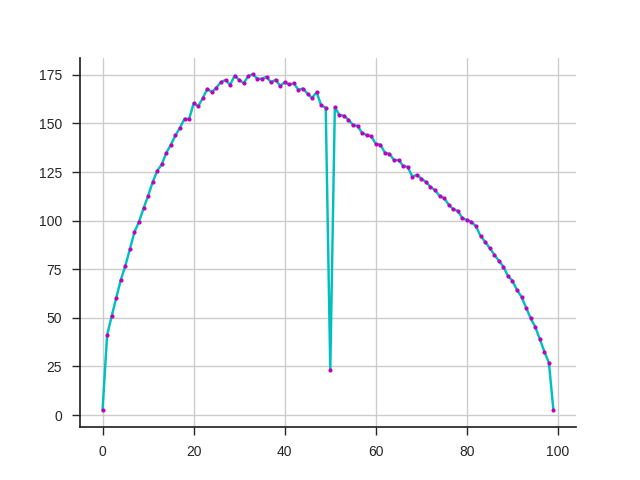

In [31]:
norm = (((1e5)**2)-1e5)/2.0
dr_norm = ((1e5)**2)/1.0

zeta = (hist_dd/norm - (2*hist_dr/dr_norm) + hist_rr/norm)/(hist_rr/norm)

#zeta = (hist_dd[0] - 2*hist_dr[0] + hist_rr[0])/(hist_rr[0])


plt.figure()
plt.plot(zeta,'c-')
plt.plot(zeta,'mo',markersize=3)
sn.despine()


In [32]:
hist_dd

array([  917913.,   360372.,   450695.,   547208.,   642383.,   740214.,
         839286.,   935988.,  1028554.,  1127465.,  1217522.,  1306088.,
        1393050.,  1480412.,  1565781.,  1650466.,  1729687.,  1795086.,
        1863068.,  1921494.,  1998991.,  2069044.,  2140119.,  2195138.,
        2253352.,  2296640.,  2343190.,  2394799.,  2436438.,  2481020.,
        2517974.,  2541605.,  2578869.,  2600637.,  2628990.,  2659147.,
        2676709.,  2682419.,  2699044.,  2706515.,  2716967.,  2717171.,
        2710851.,  2712377.,  2722210.,  2714793.,  2716788.,  2712137.,
        2688097.,  2664804.,  2659668.,  2625105.,  2600840.,  2574666.,
        2546350.,  2522019.,  2498293.,  2466030.,  2428303.,  2387474.,
        2343444.,  2306569.,  2271568.,  2235800.,  2193698.,  2157430.,
        2120854.,  2088378.,  2049215.,  2022757.,  1986873.,  1949222.,
        1906445.,  1857120.,  1813196.,  1760921.,  1714477.,  1668756.,
        1629074.,  1586421.,  1540221.,  1495406., 

In [33]:
hist_dr

array([ 1100.,    21.,    19.,    15.,    18.,    21.,    21.,    14.,
          24.,    21.,    14.,    14.,    16.,    19.,    16.,    20.,
          21.,    22.,    25.,    12.,    29.,    17.,    26.,    27.,
          19.,    19.,    21.,    16.,    25.,    20.,    23.,    15.,
          21.,    23.,    14.,    27.,    24.,    14.,    15.,    20.,
          15.,    27.,    26.,    17.,    14.,    30.,    30.,    29.,
          24.,    28.,   386.,    17.,    25.,    19.,    26.,    18.,
          27.,    31.,    22.,    20.,    23.,    33.,    28.,    18.,
          22.,    26.,    23.,    17.,    20.,    21.,    23.,    25.,
          31.,    23.,    30.,    18.,    27.,    18.,    30.,    21.,
          29.,    19.,    20.,    33.,    14.,    20.,    17.,    23.,
          18.,    13.,    15.,    23.,    14.,    14.,    14.,    29.,
          13.,    16.,    15.,  1105.])

In [34]:
hist_rr

array([ 625916.,    8989.,    9049.,    9229.,    9378.,    9766.,
          9958.,   10050.,   10453.,   10699.,   10899.,   10991.,
         11173.,   11568.,   11691.,   11953.,   12109.,   12225.,
         12301.,   12700.,   12547.,   13101.,   13210.,   13157.,
         13645.,   13715.,   13755.,   13974.,   14432.,   14289.,
         14686.,   14975.,   14865.,   14924.,   15280.,   15456.,
         15476.,   15763.,   15739.,   16073.,   15964.,   16069.,
         15980.,   16307.,   16301.,   16519.,   16757.,   16426.,
         16977.,   16960.,  119260.,   16674.,   16962.,   16824.,
         16870.,   17020.,   16910.,   17120.,   16972.,   16763.,
         16929.,   16695.,   16958.,   16766.,   16851.,   16576.,
         16664.,   16489.,   16835.,   16509.,   16467.,   16398.,
         16378.,   16196.,   16232.,   15922.,   15987.,   15909.,
         15663.,   15820.,   15502.,   15196.,   14986.,   15027.,
         14842.,   14851.,   14670.,   14513.,   14283.,   143

In [47]:
rt[3]

array([ 1349.76457666,  1295.33587027,  1381.79858183, ...,  1259.33597464,
        1704.59902534,  1199.63123635])

In [68]:
import astropy

In [69]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [70]:
cd = cosmo.comoving_distance(dt[2])

In [71]:
cdist = cd.value * 0.7

<IPython.core.display.Javascript object>


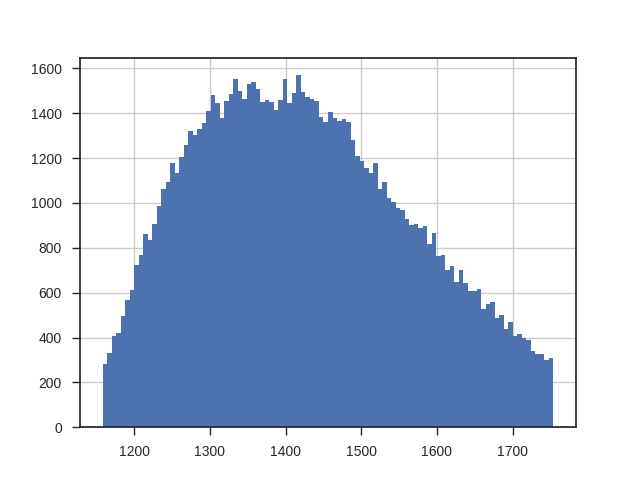

In [72]:
plt.figure()
plt.hist(rt[3],bins=100);

<IPython.core.display.Javascript object>


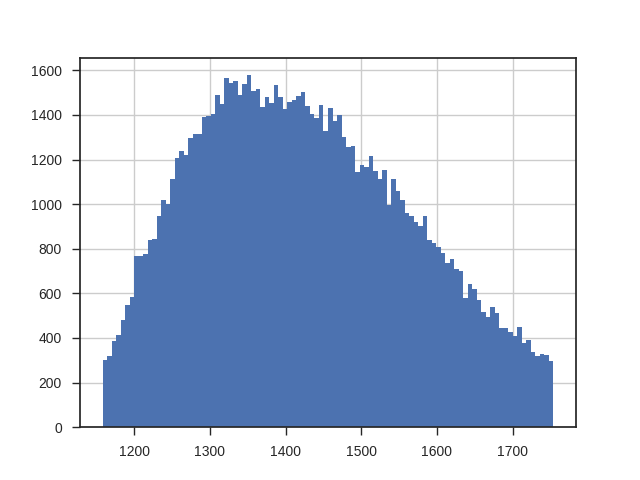

(array([  301.,   320.,   386.,   412.,   482.,   549.,   583.,   769.,
          766.,   775.,   838.,   845.,   945.,  1018.,  1002.,  1114.,
         1205.,  1240.,  1219.,  1298.,  1313.,  1316.,  1389.,  1396.,
         1404.,  1488.,  1448.,  1566.,  1543.,  1552.,  1489.,  1540.,
         1578.,  1508.,  1515.,  1434.,  1481.,  1453.,  1533.,  1482.,
         1427.,  1460.,  1466.,  1483.,  1504.,  1440.,  1405.,  1388.,
         1445.,  1326.,  1433.,  1373.,  1400.,  1300.,  1257.,  1260.,
         1145.,  1175.,  1167.,  1218.,  1148.,  1112.,  1153.,   995.,
         1112.,  1059.,  1020.,   960.,   947.,   921.,   900.,   946.,
          840.,   824.,   810.,   782.,   737.,   755.,   710.,   698.,
          578.,   643.,   620.,   570.,   517.,   494.,   539.,   510.,
          446.,   444.,   425.,   408.,   447.,   377.,   389.,   335.,
          317.,   326.,   322.,   297.]),
 array([ 1158.29828336,  1164.2540733 ,  1170.20986324,  1176.16565317,
         1182.12144311

In [74]:
plt.figure()
plt.hist(cdist,bins=100)